# Dataset

## Unicorn Companies Dataset


<p style="font-size:1.5rem">A unicorn company, or unicorn startup, is a private company with a valuation of over $1 billion. This dataset provides the list of current unicorn companies in the world. The latest update is on March 2022, there are 1035 unicorn companies in the world.</p>

## Countries Dataset (worldmapdata)


<p style="font-size:1.5rem">
Original API url: https://restcountries.com/v2/all <br>
Modified version to make it compatible with the country name in the unicorn companies dataset.
</p>

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import json

In [2]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Import Dataset

In [3]:
dataframe = pd.read_csv("../input/unicorn-companies-dataset/Unicorn_Companies.csv")

# Understand the structure of data and example of data

In [4]:
dataframe.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

<p style="font-size:1.5rem">There are 13 columns in the dataset providing the information about the unicorn company.</p>
<ol style="font-size: 1.25rem">
    <li>Company: The name of the company</li>
    <li>Valuation (&dollar;B): Economic value of the company in the digit of billion US dollar.</li>
    <li>Date Joined: The date that company become the unicorn company.</li>
    <li>Country: The country where company was established</li>
    <li>City: The city where company was established</li>
    <li>Industry: The industry of company</li>
    <li>Select Inverstors: List of selected companies that invest during founding stage in the unicorn company</li>
    <li>Founded Year: The launch year of the company.</li>
    <li>Total Raised: The full deal size of an investment.</li>
    <li>Financial Stage: The current financial stage of the company</li>
    <li>Investors count: The total number of investors</li>
    <li>Deal Terms</li>
    <li>Portfolio Exits</li>
</ol>

<p style="font-size: 1.25rem">There is no useful descriptive information about deal terms and portfolio exits, so we decide not to use them.</p>

In [5]:
dataframe.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [6]:
dataframe.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


# Data Cleaning and Data Preprocessing

## Valuation (&dollar;B)

<p style="font-size:1.25rem">
We are going to convert valuation columns to be numeric column.
</p>

In [8]:
# Remove Dollar sign and convert to float
dataframe["Valuation ($B)"] = dataframe["Valuation ($B)"].replace({"\$": ""},regex=True).astype(float)

## Date Joined

<p style="font-size:1.25rem">
We are going to convert date joined column to be date.
</p>

In [9]:
dataframe["Date Joined"] = pd.to_datetime(dataframe["Date Joined"])

## Country, City, and Industry

<p style="font-size:1.25rem">
We are going to convert country, city, and industry columns to be categorical.
</p>

In [10]:
dataframe["Country"] = dataframe["Country"].astype('category')
dataframe["City"] = dataframe["City"].astype('category')
dataframe["Industry"] = dataframe["Industry"].str.upper()
dataframe["Industry"] = dataframe["Industry"].replace({"FINTTECH":"FINTECH"},regex=True)
dataframe["Industry"] = dataframe["Industry"].astype('category')

## Founded Year

<p style="font-size:1.25rem">
We are going to convert founded year to be numeric type.
</p>

In [11]:
dataframe.loc[dataframe["Founded Year"] == "None","Founded Year"] = 0
dataframe["Founded Year"] = dataframe["Founded Year"].astype(int)

## Total Raised

<p style="font-size:1.25rem">
We are going to convert total raised columns to be numeric column and in dollar format.
</p>

In [12]:
# Remove dollar sign 
dataframe["Total Raised"] = dataframe["Total Raised"].replace({"\$": ""},regex=True)
# Transform the total raised that ends with B by multiply with 10^9 and convert type back to string for preventing type error
dataframe.loc[dataframe["Total Raised"].str.endswith('B'),"Total Raised"] = (dataframe[dataframe["Total Raised"].str.endswith('B')]["Total Raised"].replace({"B":""},regex=True).astype(float) * 1_000_000_000).astype(str) 
# Transform the total raised that ends with M by multiply with 10^6 and convert type back to string for preventing type error
dataframe.loc[dataframe["Total Raised"].str.endswith('M'),"Total Raised"] = (dataframe[dataframe["Total Raised"].str.endswith('M')]["Total Raised"].replace({"M":""},regex=True).astype(float) * 1_000_000).astype(str)
# Transform the total raised that ends with K by multiply with 10^3 and convert type back to string for preventing type error
dataframe.loc[dataframe["Total Raised"].str.endswith('K'),"Total Raised"] = (dataframe[dataframe["Total Raised"].str.endswith('K')]["Total Raised"].replace({"K":""},regex=True).astype(float) * 1_000).astype(str)
# Transform the total raised that has value is None to be 0
dataframe.loc[dataframe["Total Raised"] == "None","Total Raised"] = "0"
# Convert total raised column to be float 
dataframe["Total Raised"] = dataframe["Total Raised"].astype(float)

## Financial Stage

In [13]:
dataframe["Financial Stage"].value_counts()

None           988
Acquired        22
Divestiture      8
IPO              7
Acq              7
Asset            1
Take             1
Management       1
Reverse          1
Corporate        1
Name: Financial Stage, dtype: int64

<p style="font-size:1.25rem">
Since there are a lot of None in Financial Stage column, so we decide to drop this column.
</p>

In [14]:
dataframe = dataframe.drop("Financial Stage", axis=1)

## Investors Count

<p style="font-size:1.25rem">
We are going to convert investors count columns to be numeric column.
</p>

In [15]:
dataframe.loc[dataframe["Investors Count"] == "None", "Investors Count"] = "0"
dataframe["Investors Count"] = dataframe["Investors Count"].astype(int)

## Deal Terms and Portfolio Exits

<p style="font-size:1.25rem">
Since we have less information about these two columns, so we decide to drop these columns.
</p>

In [16]:
dataframe = dataframe.drop(["Deal Terms","Portfolio Exits"], axis=1)

## Year Joined

<p style="font-size:1.25rem">
We are going to extract year joined from the date joined.
</p>

In [17]:
dataframe["Year Joined"] = dataframe["Date Joined"].apply(lambda x: x.year)

## Year to become unicorn company

<p style="font-size:1.25rem">
Since we know the year that company founded and year that company become unicorn, we can find number of year that the company use to become the unicorn.
</p>

In [18]:
dataframe["Year to Unicorn"] = dataframe["Year Joined"] - dataframe["Founded Year"]
dataframe.loc[dataframe["Year to Unicorn"] == dataframe["Year Joined"],"Year to Unicorn"] = 0
dataframe["Year to Unicorn"] = dataframe["Year to Unicorn"].astype(int)

## Explore current dataframe

In [19]:
dataframe.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Year Joined,Year to Unicorn
0,Bytedance,140.0,2017-04-07,China,Beijing,ARTIFICIAL INTELLIGENCE,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,28,2017,5
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,OTHER,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,29,2012,10
2,Stripe,95.0,2014-01-23,United States,San Francisco,FINTECH,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,39,2014,4
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,FINTECH,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,56,2011,6
4,Epic Games,42.0,2018-10-26,United States,Cary,OTHER,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,25,2018,27


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   category      
 4   City               1037 non-null   category      
 5   Industry           1037 non-null   category      
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   int64         
 8   Total Raised       1037 non-null   float64       
 9   Investors Count    1037 non-null   int64         
 10  Year Joined        1037 non-null   int64         
 11  Year to Unicorn    1037 non-null   int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 89.9+ KB


In [21]:
dataframe.describe()

,Valuation ($B),Founded Year,Total Raised,Investors Count,Year Joined,Year to Unicorn
count,1037.000000,1037.000000,1.037000e+03,1037.000000,1037.000000,1037.000000
mean,3.292083,1929.251688,5.624418e+08,14.418515,2019.820636,6.828351
std,7.309781,401.499520,7.326493e+08,9.951832,1.999189,5.607449
min,1.000000,0.000000,0.000000e+00,0.000000,2007.000000,-4.000000
25%,1.080000,2011.000000,2.173000e+08,8.000000,2019.000000,4.000000
50%,1.600000,2014.000000,3.686000e+08,13.000000,2021.000000,6.000000
75%,3.100000,2016.000000,6.283000e+08,19.000000,2021.000000,8.000000
max,140.000000,2021.000000,7.440000e+09,91.000000,2022.000000,98.000000


# Visualize the data

## Distribution of valuation in unicorn companies

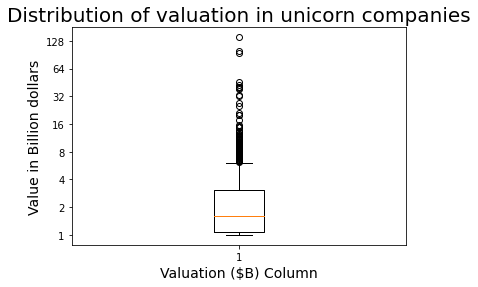

In [22]:
ax = plt.subplot()
plt.boxplot(dataframe["Valuation ($B)"])
plt.yscale('log', base=2)
plt.xlabel("Valuation ($B) Column",fontsize=14)
plt.ylabel("Value in Billion dollars",fontsize=14)
plt.title("Distribution of valuation in unicorn companies",fontsize=20)
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))

<p style="font-size:1.25rem">
The distribution of valuation in unicorn companies graph shows that most valuation of company landed about 1.5 - 3 billion dollar. In addition, the high valuation companies clearly different from normal unicorn companies.
</p>

## Distribution of year to become unicorn companies

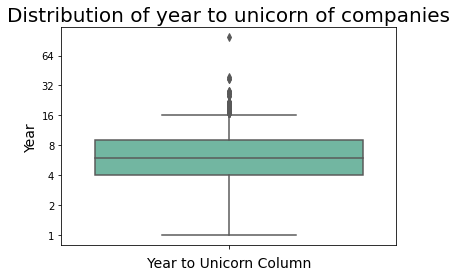

In [23]:
ax = plt.subplot()sns.boxplot(y=dataframe.loc[dataframe["Year to Unicorn"] > 0,"Year to Unicorn"],palette="Set2")plt.yscale('log', base=2)plt.xlabel("Year to Unicorn Column",fontsize=14)plt.ylabel("Year",fontsize=14)plt.title("Distribution of year to unicorn of companies",fontsize=20)ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))

<p style="font-size:1.25rem">
The distribution of years to become unicorn companies graph shows that most companies use 4 - 12 years to become the unicorn companies. In addition, there are some companies that take more than 16 years to become unicorns and the most one is up to 98 years.
</p>

In [24]:
print("Most year:", max(dataframe["Year to Unicorn"]))

Most year: 98


## Top 10 most valuation unicorn companies

In [25]:
top10_valuation_company = dataframe.sort_values("Valuation ($B)",ascending=False)[:10]fig = px.bar(top10_valuation_company,              x="Company",              y="Valuation ($B)",             title="Top 10 most valuation unicorn companies",             color="Company",              color_discrete_sequence=px.colors.qualitative.Pastel)iplot(fig)

<p style="font-size:1.25rem">
The top 10 companies based on the valuation graph shows that Bytedance has the most valuation value and is clearly different from the second and the third which are Spacex and Stripe that have a similar value. In addition, other companies have about the same valuation.
</p>

## Top 10 countries based on valuation of unicorn company

In [26]:
groupby_country = dataframe.groupby("Country")top10_valuation_country = groupby_country.sum("Valuation ($B)").sort_values("Valuation ($B)",ascending=False)[:10]top10_valuation_country = top10_valuation_country.reset_index()fig = px.bar(top10_valuation_country,              x="Country",              y="Valuation ($B)",             title="Top 10 countries based on valuation of unicorn company",             color="Country",              color_discrete_sequence=px.colors.qualitative.Pastel)iplot(fig)

<p style="font-size:1.25rem">
The top 10 countries based on the valuation of unicorn company graph shows that the United States has the most valuation value and is clearly different from other countries. And China is the second unicorn company that has the most valuation.
</p>

## Proportion of top 10 countries based on number of company

In [27]:
groupby_country = dataframe.groupby("Country")
top10_company_country = groupby_country.count().sort_values("Company",ascending=False)[:10]
top10_company_country = top10_company_country.reset_index()
fig = px.pie(top10_company_country,
             values='Company',
             names='Country',
             title='Proportion of top 10 countries based on number of company',
             color_discrete_sequence=px.colors.qualitative.Pastel)
iplot(fig)

<p style="font-size:1.25rem">
    The proportion of the top 10 countries based on the number of company chart shows that the United States has unicorn companies more than half of all unicorn companies, followed by China with 18.2%.
</p>

## Treemap of Valuation based on industry, country, and city

In [28]:
tree_df = dataframe.copy()
tree_df["Country"] = tree_df["Country"].astype(object)
tree_df["City"] = tree_df["City"].astype(object)
tree_df["Industry"] = tree_df["Industry"].astype(object)

fig = px.treemap(tree_df,path=["Industry","Country", "City","Company"],
            values="Valuation ($B)",
            title="Valuation based on industry, country, and city",
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(root_color="#cccccc")
iplot(fig)

<p style="font-size:1.25rem">
    The valuation based on industry, country, and city treemap shows that the most valuation is fintech or financial technology industry, internet software industry, and E-commerce industry respectively. The United States has the most valuation in the top 3 industries while China has the most valuation in artificial intelligence, hardware and transportation.
</p>

## Number of companies reached unicorn in each year based on industry

In [29]:
industry_year = dataframe.groupby(['Year Joined', 'Industry']).count()industry_year = industry_year.reset_index()fig = px.line(    industry_year,    x="Year Joined",    y="Company",    title='Number of companies reached unicorn in each year based on industry',    color="Industry",    color_discrete_sequence=px.colors.qualitative.Pastel)iplot(fig)

<p style="font-size:1.25rem">
    The number of companies reaching a unicorn company each year based on the industry graph shows that in 2021 most industries have an increase of unicorn companies suddenly. The fintech or financial technology industry and internet industry are two industries that have a lot of companies reached unicorns.
</p>

## Geographic map of unicorns companies count in the world

In [30]:
# Import Countries Information
countries_info = json.load(open('../input/worldmapdata/all_countries.json'))

# Create dataframe of country count
dataset = groupby_country.count().reset_index()
# Create new column by mapping country name with country numeric code
dataset['id'] = dataset['Country'].map(lambda x: int(list(filter(lambda country: country['name'] == x or country['nativeName'] == x, countries_info))[0]["numericCode"]))
# Create tooltip show country name and unicorn companies count
dataset['tooltip'] = dataset['Country'].astype(str) + ': ' + dataset['Company'].astype(str)

countries = alt.topo_feature("https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/dataset/world-110m.json", 'countries')

background = alt.Chart(countries).mark_geoshape(fill='#eee').project('equirectangular').properties(
    width=500,
    height=300,
    title='Geographic map of unicorns companies count in the world'
)

data_display = alt.Chart(dataset).mark_geoshape().encode(
    color=alt.Color('Company:Q',
                    title="Companies Count",
                    scale=alt.Scale(range=['#e6f5c9','#c5e8c3','#b1e1bb','#69c2ca','#51b2cd','#3c9fc7'])),
    tooltip='tooltip').transform_lookup(lookup='id', from_=alt.LookupData(countries, key='id',fields=["type", "properties", "geometry"])
)

background + data_display

alt.LayerChart(...)

<p style="font-size:1.25rem">
    Most unicorn companies are located in the United States, followed by China. 
</p>